In [2]:
# EDA ==> Exploratory Data Analysis

Parts of EDA

1. Univariate Analysis ==> Analysis on a single Independent column
2. Bivariate Analysis ==> Analysis on two columns
3. Multivariate Anlaysis ==> Analysis on more than 2 columns

In [6]:
# Data Types 
# 1. Numerical Data ==> Continuous Data ==> Age(year, month, days) , height , weight etc..
# 2. Categorical Data ==> Describe Data ==> Total Number of Employees

In [9]:
import numpy as np
import pandas as pd

In [10]:
# !pip install matplotib
# !pip install seaborn

In [11]:
import matplotlib.pyplot as plt # Visulaization Library
import seaborn as s # matplotlib's updated version is seaborn .

In [13]:
df = pd.read_csv("C:\\Users\\ss\\Desktop\\pranav\\titanic.csv")

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

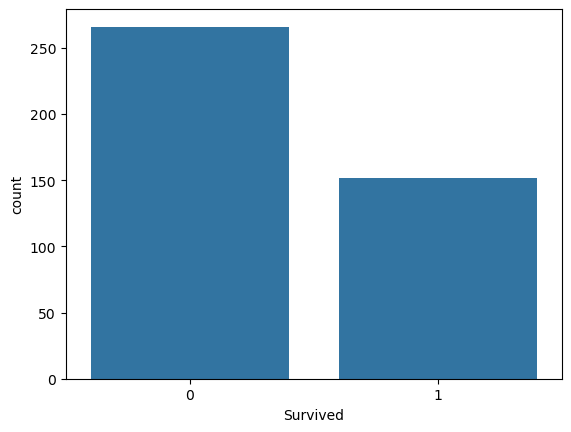

In [27]:
sns.countplot(x = df['Survived'])

In [29]:
# if we want to see actual vaues then we use value_counts() .

df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived'>

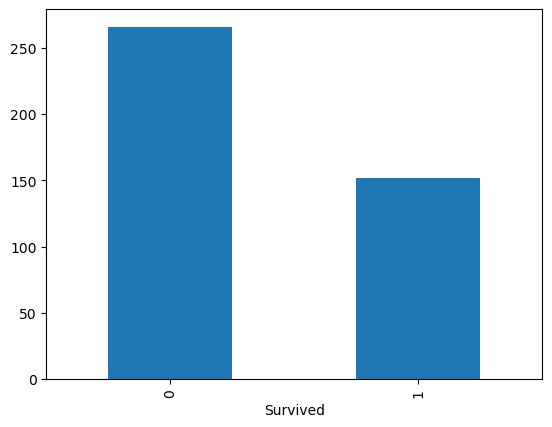

In [37]:
df['Survived'].value_counts().plot(kind='bar')

In [39]:
# Boxplot
# for fixed our outliers

# 1. Lower fence
# 2. 25% data
# 3. IQR (Inter Quartile Range)(75%-25%)
# 4. 75% data
# 5. upper fence

In [41]:
# x = 1,2,3,4,5
# mean = (1+2+3+4+5)/5 = 15/5 = 3 ###HERE 100 IS OUTLIER
# x - 1,,3,4,5,100
# mean = 15+100/6 = 115/6 = 19.3

<Axes: xlabel='Age'>

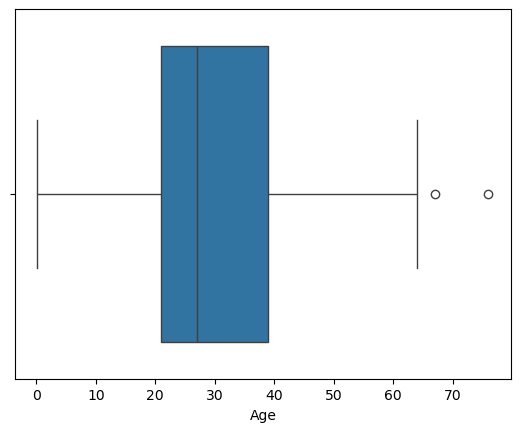

In [43]:
sns.boxplot(x = df['Age'])

In [45]:
tips = sns.load_dataset('tips')

In [47]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Bivariate Analysis

<Axes: xlabel='total_bill', ylabel='tip'>

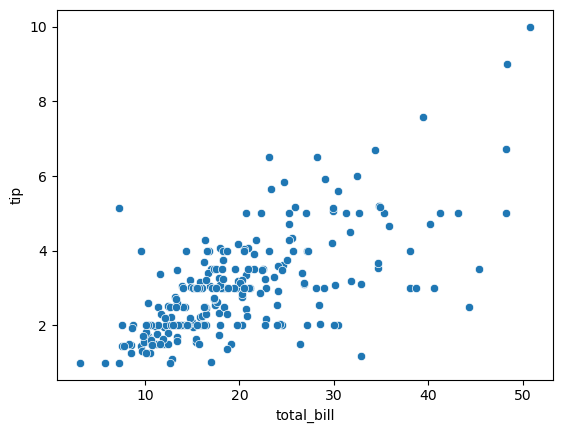

In [51]:
# 1. scattereplot(Numerical column - Numerical column)
sns.scatterplot(x = tips['total_bill'], #df['total_bill']
                y = tips['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

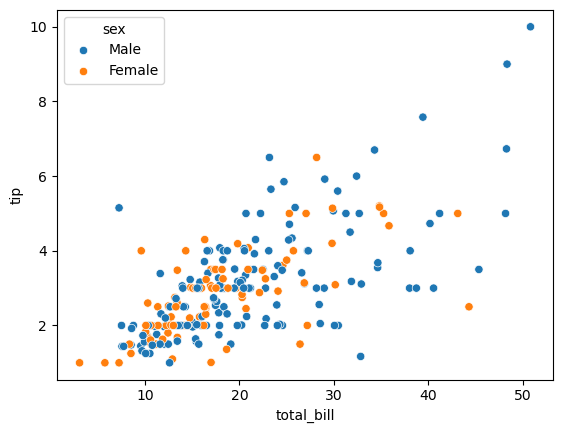

In [55]:
sns.scatterplot(x='total_bill' , y='tip', data=tips, hue = tips['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

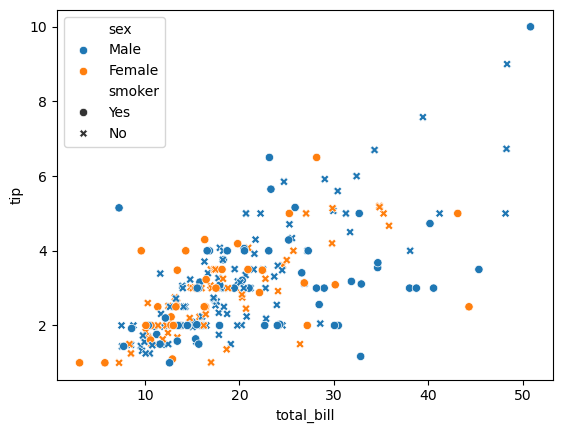

In [57]:
sns.scatterplot(x='total_bill',
                y='tip', data=tips,
                hue = tips['sex'] , style = tips['smoker'])

In [59]:
# Hetamap(Categorial-Categorical) ### used here titanic dataset
p = pd.crosstab(tips['day'] , tips['time'])
p

time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


<Axes: xlabel='time', ylabel='day'>

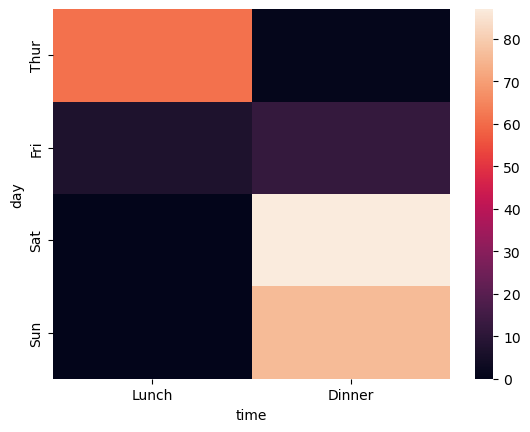

In [61]:
sns.heatmap(p)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [67]:
df1 = df.drop(columns = ['Name' , 'Sex', 'Ticket', 'Cabin', 'Embarked'])
df1 = df1.dropna()

<Axes: ylabel='Survived'>

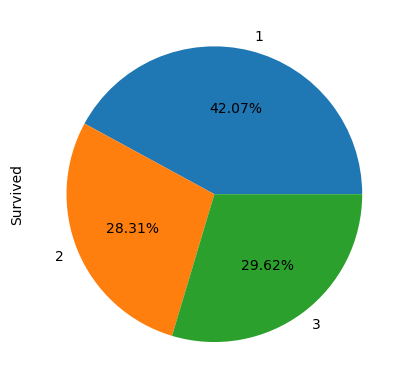

In [71]:
((df1.groupby('Pclass').mean()['Survived'])*100).plot(kind='pie', autopct='%.2f%%')